# Pregunta 1
Carrega el dataset i mostra les primeres 5 files.

In [8]:
import pandas as pd

df = pd.read_csv('laptop_prices.csv')
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# Pregunta 2

Falten dades al dataset. A quina columna?

In [9]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         5
Weight              0
Price               0
dtype: int64

# Pregunta 3
Substitueix els valors faltant per la mitjana de les dades de la mateixa marca. Comprova que després de fer-ho no falten valors.

In [5]:
df.iloc[[9,57,94,115,131]]

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
9,Acer,3.341111,32,512,NaN,4.093149,18501.832733
57,HP,3.745136,4,512,NaN,3.034453,17076.681329
94,Dell,3.305667,4,256,NaN,2.387523,9107.981058
115,Acer,2.170159,32,1000,NaN,4.297487,32689.030390
131,Acer,2.854086,32,512,NaN,2.340322,18464.505286


In [10]:
df['Screen_Size'] =  df['Screen_Size'].fillna(df['Screen_Size'].mean())

In [7]:
df.groupby('Brand').count()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Brand,,,,,,
Acer,204,204,204,204,204,204
Asus,206,206,206,206,206,206
Dell,210,210,210,210,210,210
HP,190,190,190,190,190,190
Lenovo,190,190,190,190,190,190


# Pregunta 4
Que faries si en alguna dada li falta la marca?

> Aplicaria la moda

# Pregunta 5
Mostra amb un gràfic quants elements hi han de cadascuna de les marques al dataset.

<Axes: xlabel='Brand'>

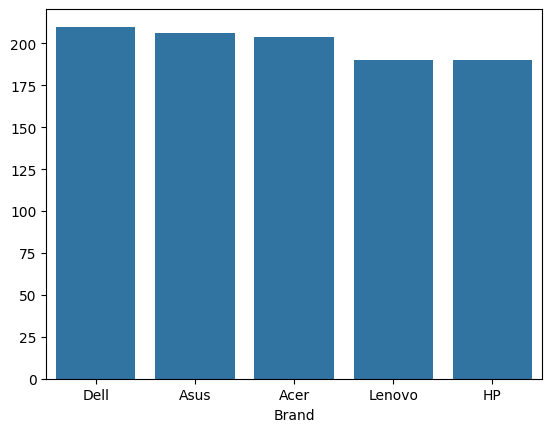

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=df['Brand'].value_counts().index, y=df['Brand'].value_counts().values)

# Pregunta 6
Està compensat el dataset?

SI

# Relacions entre variables
Anem a estudiar si hi ha una relació entre algunes característiques i el preu. Mostra un gràfic de dispersió entre les variables potència del processador, RAM, disc dur i pes amb el preu.

Volem dibuixa-ho en 4 gràfics que es visualitzen alhora, en una graella de dos files i dos columnes, però com a bons programadors ho farem per parts

# Pregunta 7
Crea una funció que es diga `dibuixa_relacio_amb_target`:
  - Ha de rebre com a arguments un dataframe, i el nom de dos variables, i representarà un gràfic de dispersió entre eixes dos columnes del dataframe. L'últim argument de la funció deu ser el ax (gràfice) on el dibuixarà, sent `None` per defecte

  > Prova la crida amb `dibuixa_relacio_amb_target(price_data,'Weight','Price')`

In [9]:
def dibuxa_relacio_amb_target(df, x, y, ax=None):
    sns.scatterplot(x=df[x], y=df[y], ax=ax)

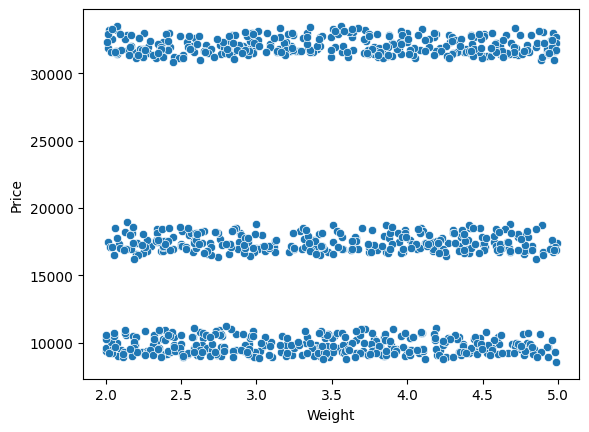

In [10]:
dibuxa_relacio_amb_target(df, 'Weight', 'Price')

# Pregunta 8
Donades les següents variables, fes un bloc de codi que genere la grafica amb els 4 diagrames de dispersió, dins d'una mateixa figura.
```
dades=['Processor_Speed','RAM_Size','Storage_Capacity','Weight']
objectiu='Price'
```

> **TIP**: Crea subfigures, i pássa-li a la funció anterior en cada ax una figura

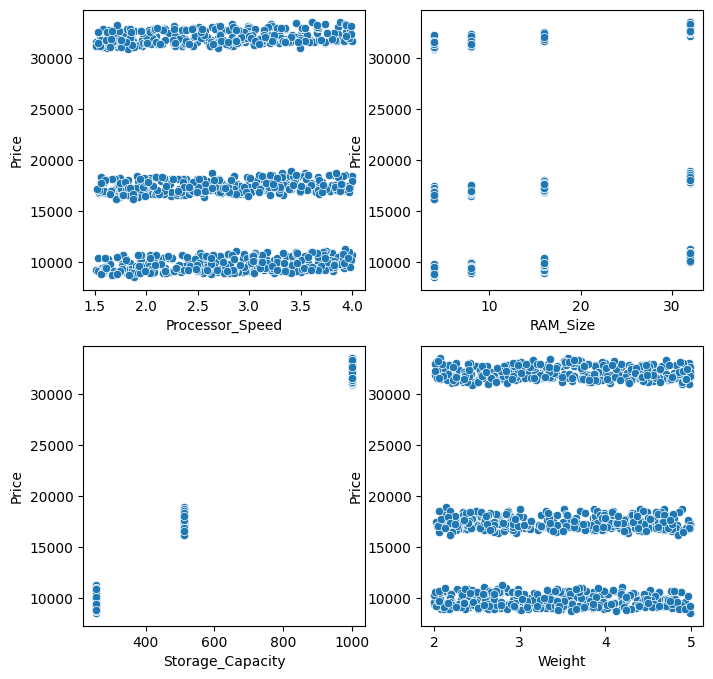

In [11]:
dades=['Processor_Speed','RAM_Size','Storage_Capacity','Weight']
objectiu='Price'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

dibuxa_relacio_amb_target(df, dades[0], objectiu, ax=axes[0, 0])
dibuxa_relacio_amb_target(df, dades[1], objectiu, ax=axes[0, 1])
dibuxa_relacio_amb_target(df, dades[2], objectiu, ax=axes[1, 0])
dibuxa_relacio_amb_target(df, dades[3], objectiu, ax=axes[1, 1])

# Pregunta 9
Ara volem relacionar tres variables en un gràfic 2D. Dibuixa la relació preu-velocitat del processador diferenciant cada representació segons la capacitat del disc en un gràfic adequat.

<Axes: xlabel='Processor_Speed', ylabel='Price'>

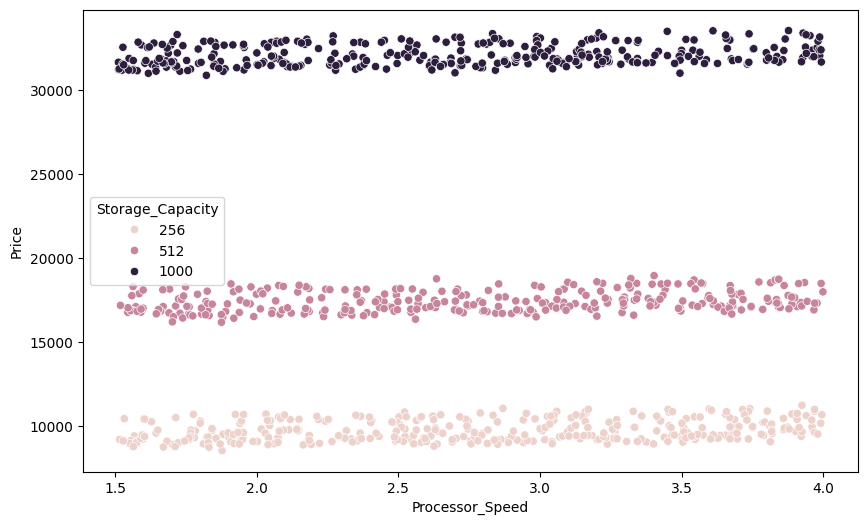

In [12]:
plt.figure(figsize=(10, 6))
#scatter = plt.scatter(df['Processor_Speed'], df['Price'], c=df['Storage_Capacity'], cmap='viridis', alpha=0.6)
#plt.colorbar(scatter, label='Storage Capacity')

sns.scatterplot(x=df['Processor_Speed'], y=df['Price'], data=df, hue=df['Storage_Capacity'])

# Fem prediccions

Volem definir un model d'IA per a predir el preu d'un portàtil donades les seues característiques.

# Pregunta 10
Comencem per arreglar les nostres dades per poder passar-li'l a un algorisme de ML.

In [11]:
X = df.drop('Price', axis=1)
y = df['Price']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

num_cols = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']
text_cols = ['Brand']

preprocessor = make_column_transformer(
    (StandardScaler(), num_cols),
    (OneHotEncoder(), text_cols)
)

X = preprocessor.fit_transform(X)

In [5]:
X

array([[ 1.47612831,  0.0455242 , -0.23166366, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22178769, -1.04705664,  1.32603954, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6713098 , -1.04705664, -1.04881944, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.61517648, -1.04705664, -0.23166366, ...,  1.        ,
         0.        ,  0.        ],
       [-1.56737896, -0.68286303, -1.04881944, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41999952, -1.04705664, -1.04881944, ...,  0.        ,
         0.        ,  1.        ]])

# Pregunta 11
Divideix les dades en dades d'entrada i dades objectiu.

# Pregunta 12
Divideix les dades en dos blocs, entrenament (80%) i validació(20%) amb una llavor d'1.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pregunta 13
Entrena un GradientBoostingRegressor sense hiperparàmetres i imprimeix els errors de validació i d'entrenamet. Quin és major? Perquè?

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [14]:
GBR_model = GradientBoostingRegressor().fit(X_train, y_train)

In [16]:
GBR_predict = GBR_model.predict(X_test)

GBR_mae = mean_absolute_error(y_test, GBR_predict)
print('GBR MAE: ', GBR_mae, '\nPrice mean: ', y.mean())

GBR MAE:  165.55428657263522 
Pice mean:  19604.18796323342


# Pregunta 14

Un dels hiperparàmetres que podem passar-li a l'algorisme és `loss` (funció de pèrdua que volem utilitzar), un altre és `n_estimators` (arbres utilitzats) i un altre el `learning_rate` (pes de cada arbre en el model final).

El nombre d'estimadors òptims creiem que estarà entre 30 i 120. 

Representa gràficament les corbes d'aprenentatge en variar el model entre estos valors (evolució de l'error absolut tant en les dades d'entrenament com de validació). Fes-ho definint una funció que reba les x i les y tant d'entrenament com de validació i faça un gràfic adequat.

La funció de pèrdua per al model serà `absolute_error`. 

In [95]:
# Funció
def busquedaOptima_N_estimators(X_test, X_train, y_train, y_test):
    mae_evolution = []

    for n in range(30,120):
        GBR_model = GradientBoostingRegressor(loss='absolute_error', n_estimators= n, learning_rate=0.1, random_state=42).fit(X_train, y_train)
        mae_evolution.append(mean_absolute_error(y_test, GBR_model.predict(X_test)))

    return mae_evolution 

In [96]:
mae_evolution = busquedaOptima_N_estimators(X_test, X_train, y_train, y_test)

<Axes: >

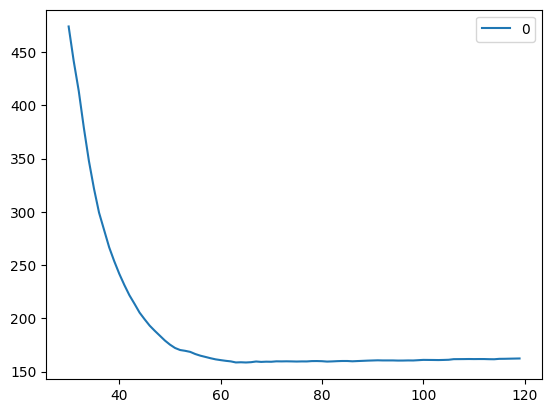

In [97]:
# Gràfic
dataframe = pd.DataFrame(mae_evolution, range(30,120))

sns.lineplot(dataframe)

# Pregunta 15
Comenta el gràfic obtingut. S'observa underfitting o overfitting? Podem estimar el valor òptim amb el gràfic?

# Pregunta 16
Extrau de les dades que hem obtingut el nombre òptim d'estimadors i l'error associat.

In [98]:
import numpy as np

min_mae = np.min(mae_evolution)
min_index = np.argmin(mae_evolution)

print('Min MAE: ', min_mae, '\nN_Estimator: ', min_index)

Min MAE:  158.48209757886423 
N_Estimator:  35


# Pregunta 17
Anem a repetir el procés, esta vegada amb el `learning_rate`.

L'òptim es situarà entre els valors 2 i 0.001. Dibuixa les corbes d'aprenentatge per a eixe rang amb 40 divisions.

In [99]:
def busquedaOptima_LearningRate(X_test, X_train, y_train, y_test):
    mae_evolution = []
    learning_rates = np.linspace(2, 0.001, 40)

    for i, n in enumerate(learning_rates):
        GBR_model = GradientBoostingRegressor(loss='absolute_error', learning_rate=n, random_state=42).fit(X_train, y_train)
        mae_evolution.append(mean_absolute_error(y_test, GBR_model.predict(X_test)))

    return mae_evolution 

In [100]:
mae_evolution = busquedaOptima_LearningRate(X_test, X_train, y_train, y_test)

Text(0.5, 0, 'Learning Rate')

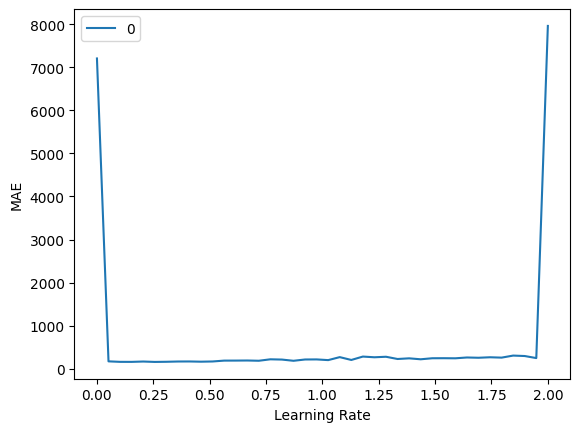

In [101]:
dataframe = pd.DataFrame(mae_evolution, np.linspace(2, 0.001, 40))

sns.lineplot(dataframe)
plt.ylabel('MAE')
plt.xlabel('Learning Rate')

# Pregunta 18
Comenta el gràfic obtingut. S'observa underfitting o overfitting? Podem estimar el valor òptim amb el gràfic?

> Amb el grafic no es pot estimar el valor òptim

# Pregunta 19
Extrau de les dades que hem obtingut el nombre òptim de taxa d'aprenentatge i l'error associat.

In [103]:
print(np.min(mae_evolution), dataframe.idxmin())

159.82465493586716 0    0.257282
dtype: float64


# Pregunta 20
Defineix un model amb els paràmetyres òptims que has calculat i la funció de pèrdua error absolut. Calcula el MAE. Has obtés el millor MAE? Perquè?

In [105]:
model_optim = GradientBoostingRegressor(loss='absolute_error', n_estimators=35, learning_rate=0.257282).fit(X_train, y_train)
mean_absolute_error(y_test, model_optim.predict(X_test))

np.float64(156.37874453954518)

# Pregunta 21
Per trobar els millors paràmetres pots utilitzar el `GridSearchCV`. Buscant com a 'learning_rate'entre 0.3 i 0.001 i entre 85 i 100 estimadors.

Per llevar aleatorietat definirem la llavor a 1.

Tingues en compte que esta tècnica pot tardar, defineix 10 particions per al learning rate.

In [109]:
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor(random_state=1)
parameters = {'n_estimators': range(85, 100), 'learning_rate': np.linspace(0.3, 0.001, 10)}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=1),
             param_grid={'learning_rate': array([0.3       , 0.26677778, 0.23355556, 0.20033333, 0.16711111,
       0.13388889, 0.10066667, 0.06744444, 0.03422222, 0.001     ]),
                         'n_estimators': range(85, 100)})

# Pregunta 22
Defineix el model òptim amb els millors paràmetres i calcula l'error en les prediccions. Has obtés el millor resultat? Perquè?

In [111]:
prediccions = clf.predict(X_test)
mean_absolute_error(y_test, prediccions)

np.float64(166.81991988660135)

# Pregunta 23
L'error que hem obtés en l'estimació és gran o menut? Justifica la resposta.

In [112]:
y.mean()

np.float64(19604.18796323342)

l'estimació es menuda perque la mitja de les dades es molt més gran, es a dir, la diferència entre l'error mig y la mitja de les dades es molta. 19604 - 166 = 19438